# Analyse des causes d'attrition chez TechNova Partners
## Étape 3 : Feature Engineering - Préparation des données pour la modélisation

**Objectif** : Préparer les données (X et y) pour l'entraînement de modèles de Machine Learning

---
## Sous-phase 3.1 : Préparation de la variable cible (y)

**Actions** :
1. Charger le fichier `data_complete.csv`
2. Créer la Series `y` avec la variable `a_quitte_l_entreprise`
3. Convertir en format numérique (0 = Resté, 1 = Parti)
4. Vérifier la distribution

In [1]:
# 1. Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliothèques importées avec succès")

✅ Bibliothèques importées avec succès


In [9]:
# 2. Chargement des données complètes
df = pd.read_csv('data_complete.csv')

print(f"📊 Dataset chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")
print(f"\n📋 Colonnes disponibles :")
print(df.columns.tolist())
df.head()

📊 Dataset chargé : 1470 lignes, 33 colonnes

📋 Colonnes disponibles :
['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'heure_supplementaires', 'augmentation_salaire_precedente', 'a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel', 'tranche_anciennete', 'a_quitte_entreprise_num']


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augmentation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,tranche_anciennete,a_quitte_entreprise_num
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4,2,3,2,4,1,1,3,Oui,11,Oui,0,0,1,1,2,Infra & Cloud,Occasionnel,0,5,5-10 ans,1
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7,3,2,2,2,4,3,4,Non,23,Non,1,3,1,8,1,Infra & Cloud,Frequent,1,7,5-10 ans,0
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0,4,2,1,3,2,3,3,Oui,15,Oui,0,3,1,2,2,Autre,Occasionnel,0,0,NaN,1
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7,4,3,1,3,3,3,3,Oui,11,Non,0,3,1,3,4,Infra & Cloud,Frequent,3,0,5-10 ans,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2,1,3,1,2,4,3,3,Non,12,Non,1,3,1,2,1,Transformation Digitale,Occasionnel,2,2,0-2 ans,0


## Création d'une target y numérique

In [4]:
# 0 = Non (resté), 1 = Oui (parti)
y = (df['a_quitte_l_entreprise'] == 'Oui').astype(int)

print("✅ Variable cible 'y' créée avec succès\n")
print(f"Type : {type(y)}")
print(f"Dtype : {y.dtype}")
print(f"Shape : {y.shape}")
print(f"\nPremières valeurs :")
print(y.head(10))

✅ Variable cible 'y' créée avec succès

Type : <class 'pandas.core.series.Series'>
Dtype : int64
Shape : (1470,)

Premières valeurs :
0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: a_quitte_l_entreprise, dtype: int64


In [5]:
# 5. Vérification de la distribution de y
print("📊 Distribution de la target (y) - Format numérique\n")
print("Décompte :")
print(y.value_counts())
print("\nPourcentages :")
print((y.value_counts(normalize=True) * 100).round(2))
print("\n⚠️ Observation : Déséquilibre des classes")
print(f"   - Classe 0 (Restés) : {(y == 0).sum()} employés ({(y == 0).sum() / len(y) * 100:.1f}%)")
print(f"   - Classe 1 (Partis) : {(y == 1).sum()} employés ({(y == 1).sum() / len(y) * 100:.1f}%)")

📊 Distribution de la variable cible (y) - Format numérique

Décompte :
a_quitte_l_entreprise
0    1233
1     237
Name: count, dtype: int64

Pourcentages :
a_quitte_l_entreprise
0    83.88
1    16.12
Name: proportion, dtype: float64

⚠️ Observation : Déséquilibre des classes
   - Classe 0 (Restés) : 1233 employés (83.9%)
   - Classe 1 (Partis) : 237 employés (16.1%)


In [7]:
# 7. Vérification : pas de valeurs manquantes dans y
print("🔍 Vérification de la qualité de y\n")
print(f"Valeurs manquantes : {y.isnull().sum()}")
print(f"Valeurs uniques : {y.unique()}")
print(f"\n✅ Variable cible y prête pour la modélisation !")

🔍 Vérification de la qualité de y

Valeurs manquantes : 0
Valeurs uniques : [1 0]

✅ Variable cible y prête pour la modélisation !


--
## Selection de features X

#### Affichage de toutes les colones du dataset

In [8]:
print("📋 Liste complète des colonnes du DataFrame :\n")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n📊 Total : {len(df.columns)} colonnes")

📋 Liste complète des colonnes du DataFrame :

 1. id_employee
 2. age
 3. genre
 4. revenu_mensuel
 5. statut_marital
 6. departement
 7. poste
 8. nombre_experiences_precedentes
 9. nombre_heures_travailless
10. annee_experience_totale
11. annees_dans_l_entreprise
12. annees_dans_le_poste_actuel
13. satisfaction_employee_environnement
14. note_evaluation_precedente
15. niveau_hierarchique_poste
16. satisfaction_employee_nature_travail
17. satisfaction_employee_equipe
18. satisfaction_employee_equilibre_pro_perso
19. note_evaluation_actuelle
20. heure_supplementaires
21. augmentation_salaire_precedente
22. a_quitte_l_entreprise
23. nombre_participation_pee
24. nb_formations_suivies
25. nombre_employee_sous_responsabilite
26. distance_domicile_travail
27. niveau_education
28. domaine_etude
29. frequence_deplacement
30. annees_depuis_la_derniere_promotion
31. annes_sous_responsable_actuel
32. tranche_anciennete
33. a_quitte_entreprise_num

📊 Total : 33 colonnes
The history saving thread 

#### Encoder la Target

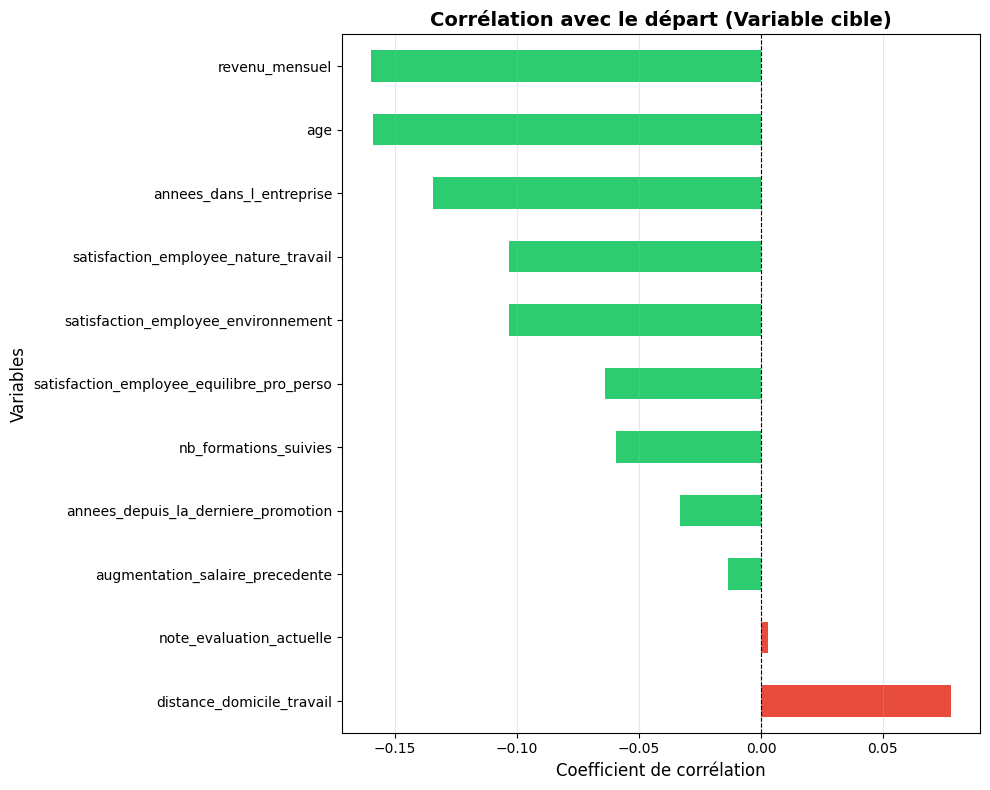


📊 TOP 5 FACTEURS CORRÉLÉS POSITIVEMENT (favorisent le départ) :
distance_domicile_travail              0.078
note_evaluation_actuelle               0.003
augmentation_salaire_precedente       -0.013
annees_depuis_la_derniere_promotion   -0.033
nb_formations_suivies                 -0.059
Name: a_quitte_entreprise_num, dtype: float64

📊 TOP 5 FACTEURS CORRÉLÉS NÉGATIVEMENT (favorisent la rétention) :
satisfaction_employee_environnement    -0.103
satisfaction_employee_nature_travail   -0.103
annees_dans_l_entreprise               -0.134
age                                    -0.159
revenu_mensuel                         -0.160
Name: a_quitte_entreprise_num, dtype: float64


In [11]:
# Encoder la variable cible en numérique pour la corrélation
df['a_quitte_entreprise_num'] = (df['a_quitte_l_entreprise'] == 'Oui').astype(int)

# Sélectionner les variables quantitatives clés
variables_cles = [
    'a_quitte_entreprise_num',
    'age',
    'revenu_mensuel',
    'annees_dans_l_entreprise',
    'annees_depuis_la_derniere_promotion',
    'satisfaction_employee_environnement',
    'satisfaction_employee_nature_travail',
    'satisfaction_employee_equilibre_pro_perso',
    'note_evaluation_actuelle',
    'augmentation_salaire_precedente',
    'nb_formations_suivies',
    'distance_domicile_travail'
]

# Calculer la corrélation
correlation_cible = df[variables_cles].corr()['a_quitte_entreprise_num'].drop('a_quitte_entreprise_num').sort_values(ascending=False)

# Visualisation
fig, ax = plt.subplots(figsize=(10, 8))
correlation_cible.plot(kind='barh', ax=ax, color=['#e74c3c' if x > 0 else '#2ecc71' for x in correlation_cible])
ax.set_title('Corrélation avec le départ (Variable cible)', fontsize=14, fontweight='bold')
ax.set_xlabel('Coefficient de corrélation', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 TOP 5 FACTEURS CORRÉLÉS POSITIVEMENT (favorisent le départ) :")
print(correlation_cible.head(5).round(3))

print("\n📊 TOP 5 FACTEURS CORRÉLÉS NÉGATIVEMENT (favorisent la rétention) :")
print(correlation_cible.tail(5).round(3))

#### Feature à exclure

In [12]:
# 2. Identification des colonnes à EXCLURE
colonnes_a_exclure = [
    'a_quitte_l_entreprise',     
    'id_employee',                
]

# Filtrer uniquement les colonnes qui existent réellement dans df
colonnes_a_exclure_reelles = [col for col in colonnes_a_exclure if col in df.columns]

print("❌ Colonnes à EXCLURE :")
for col in colonnes_a_exclure_reelles:
    print(f"   - {col}")

print(f"\n📌 Total de colonnes à exclure : {len(colonnes_a_exclure_reelles)}")

❌ Colonnes à EXCLURE :
   - a_quitte_l_entreprise
   - id_employee

📌 Total de colonnes à exclure : 2


#### création du dataframe X

In [13]:
X = df.drop(columns=colonnes_a_exclure_reelles)

print("✅ DataFrame X créé avec succès !\n")
print(f"📊 Dimensions de X : {X.shape}")
print(f"   - {X.shape[0]} lignes (observations/employés)")
print(f"   - {X.shape[1]} colonnes (features)")

print(f"\n📋 Liste des features dans X :")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")

✅ DataFrame X créé avec succès !

📊 Dimensions de X : (1470, 31)
   - 1470 lignes (observations/employés)
   - 31 colonnes (features)

📋 Liste des features dans X :
 1. age
 2. genre
 3. revenu_mensuel
 4. statut_marital
 5. departement
 6. poste
 7. nombre_experiences_precedentes
 8. nombre_heures_travailless
 9. annee_experience_totale
10. annees_dans_l_entreprise
11. annees_dans_le_poste_actuel
12. satisfaction_employee_environnement
13. note_evaluation_precedente
14. niveau_hierarchique_poste
15. satisfaction_employee_nature_travail
16. satisfaction_employee_equipe
17. satisfaction_employee_equilibre_pro_perso
18. note_evaluation_actuelle
19. heure_supplementaires
20. augmentation_salaire_precedente
21. nombre_participation_pee
22. nb_formations_suivies
23. nombre_employee_sous_responsabilite
24. distance_domicile_travail
25. niveau_education
26. domaine_etude
27. frequence_deplacement
28. annees_depuis_la_derniere_promotion
29. annes_sous_responsable_actuel
30. tranche_anciennete


#### séparation des variables qualitative et quantitatives

In [14]:
# 6. Séparation explicite : Variables quantitatives vs qualitatives
variables_quantitatives = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_qualitatives = X.select_dtypes(include=['object']).columns.tolist()

print("🔢 VARIABLES QUANTITATIVES (numériques) :\n")
for i, col in enumerate(variables_quantitatives, 1):
    print(f"{i:2d}. {col}")

print(f"\n📝 VARIABLES QUALITATIVES (catégorielles) :\n")
for i, col in enumerate(variables_qualitatives, 1):
    print(f"{i:2d}. {col}")

🔢 VARIABLES QUANTITATIVES (numériques) :

 1. age
 2. revenu_mensuel
 3. nombre_experiences_precedentes
 4. nombre_heures_travailless
 5. annee_experience_totale
 6. annees_dans_l_entreprise
 7. annees_dans_le_poste_actuel
 8. satisfaction_employee_environnement
 9. note_evaluation_precedente
10. niveau_hierarchique_poste
11. satisfaction_employee_nature_travail
12. satisfaction_employee_equipe
13. satisfaction_employee_equilibre_pro_perso
14. note_evaluation_actuelle
15. augmentation_salaire_precedente
16. nombre_participation_pee
17. nb_formations_suivies
18. nombre_employee_sous_responsabilite
19. distance_domicile_travail
20. niveau_education
21. annees_depuis_la_derniere_promotion
22. annes_sous_responsable_actuel
23. a_quitte_entreprise_num

📝 VARIABLES QUALITATIVES (catégorielles) :

 1. genre
 2. statut_marital
 3. departement
 4. poste
 5. heure_supplementaires
 6. domaine_etude
 7. frequence_deplacement
 8. tranche_anciennete


#### Analyse des variables QUALITATIVES

In [16]:
display(X[variables_quantitatives].describe().round(2))

,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,augmentation_salaire_precedente,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel,a_quitte_entreprise_num
count,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.0,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,6502.93,2.69,80.0,11.28,7.01,4.23,2.72,2.73,2.06,2.73,2.71,2.76,3.15,15.21,0.79,2.80,1.0,9.19,2.91,2.19,4.12,0.16
std,9.14,4707.96,2.50,0.0,7.78,6.13,3.62,1.09,0.71,1.11,1.10,1.08,0.71,0.36,3.66,0.85,1.29,0.0,8.11,1.02,3.22,3.57,0.37
min,18.00,1009.00,0.00,80.0,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,11.00,0.00,0.00,1.0,1.00,1.00,0.00,0.00,0.00
25%,30.00,2911.00,1.00,80.0,6.00,3.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,12.00,0.00,2.00,1.0,2.00,2.00,0.00,2.00,0.00
50%,36.00,4919.00,2.00,80.0,10.00,5.00,3.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,14.00,1.00,3.00,1.0,7.00,3.00,1.00,3.00,0.00
75%,43.00,8379.00,4.00,80.0,15.00,9.00,7.00,4.00,3.00,3.00,4.00,4.00,3.00,3.00,18.00,1.00,3.00,1.0,14.00,4.00,3.00,7.00,0.00
max,60.00,19999.00,9.00,80.0,40.00,40.00,18.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,25.00,3.00,6.00,1.0,29.00,5.00,15.00,17.00,1.00


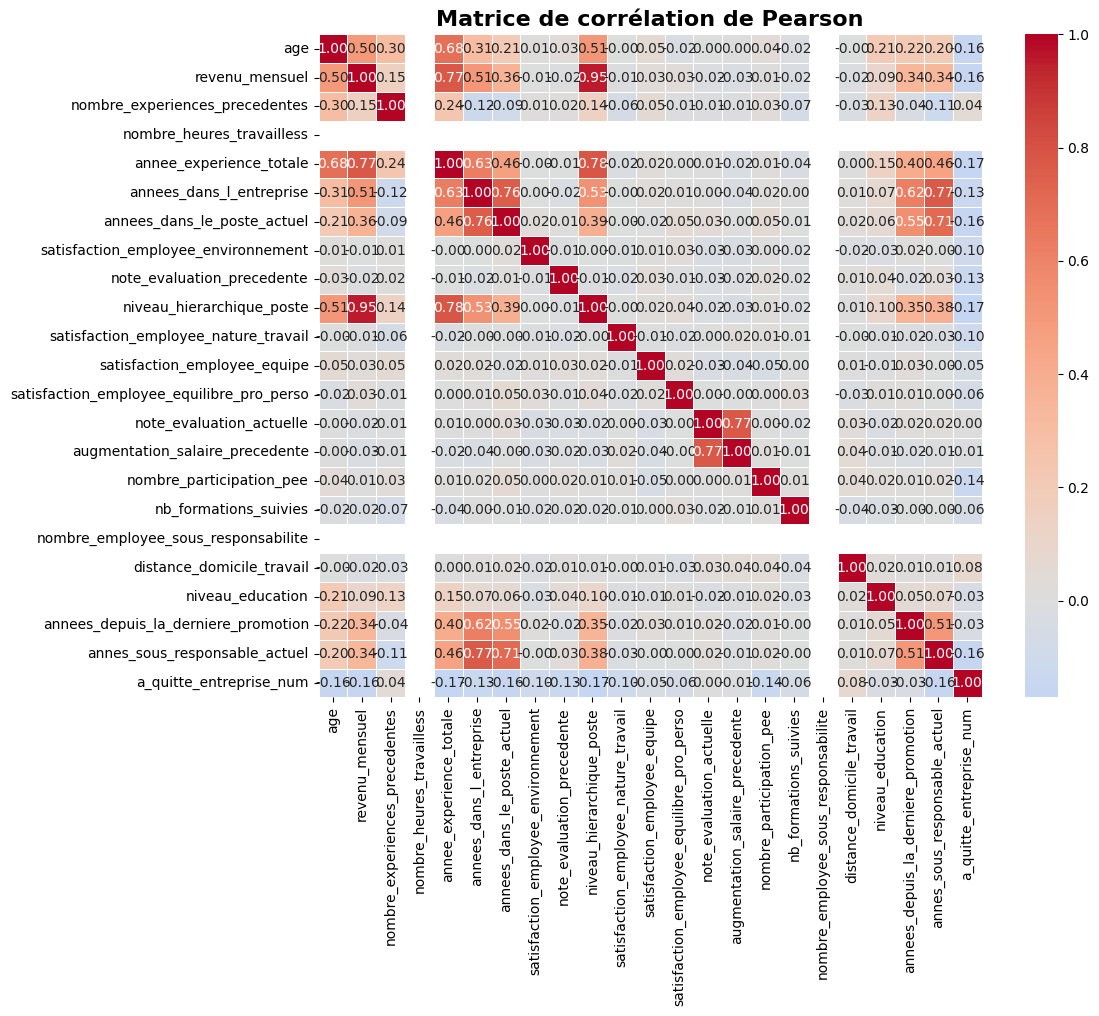

Paires de features fortement corrélées (|r| > 0.8):
        feature_1                  feature_2  correlation
0  revenu_mensuel  niveau_hierarchique_poste       0.9503

Features à supprimer : ['revenu_mensuel']


In [18]:

numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
X_num = X[numerical_features]

# Calculer la matrice de corrélation de Pearson
correlation_matrix = X_num.corr(method='pearson')

# Visualisation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Matrice de corrélation de Pearson', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Identifier les paires de features fortement corrélées (seuil > 0.8)
def find_high_correlations(corr_matrix, threshold=0.8):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'feature_1': corr_matrix.columns[i],
                    'feature_2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j]
                })
    return pd.DataFrame(high_corr_pairs)

high_corr = find_high_correlations(correlation_matrix, threshold=0.8)
print("Paires de features fortement corrélées (|r| > 0.8):")
print(high_corr)

# Décision de suppression
# Pour chaque paire corrélée, garder celle qui a la plus forte corrélation avec y
features_to_drop = []
for _, row in high_corr.iterrows():
    feat1, feat2 = row['feature_1'], row['feature_2']
    corr1 = abs(X_num[feat1].corr(y))
    corr2 = abs(X_num[feat2].corr(y))
    
    if corr1 < corr2:
        features_to_drop.append(feat1)
    else:
        features_to_drop.append(feat2)

features_to_drop = list(set(features_to_drop))
print(f"\nFeatures à supprimer : {features_to_drop}")

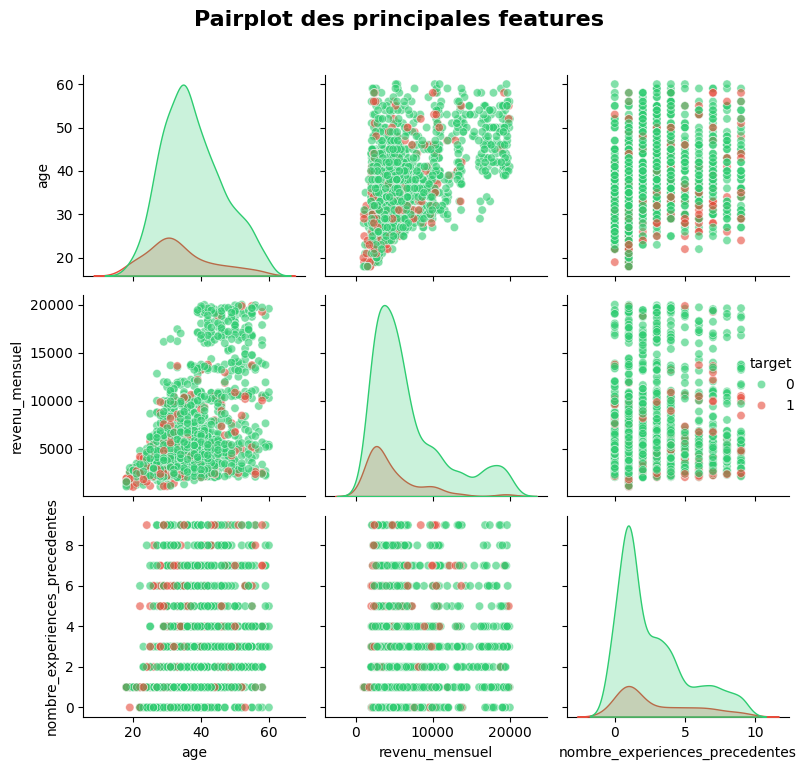

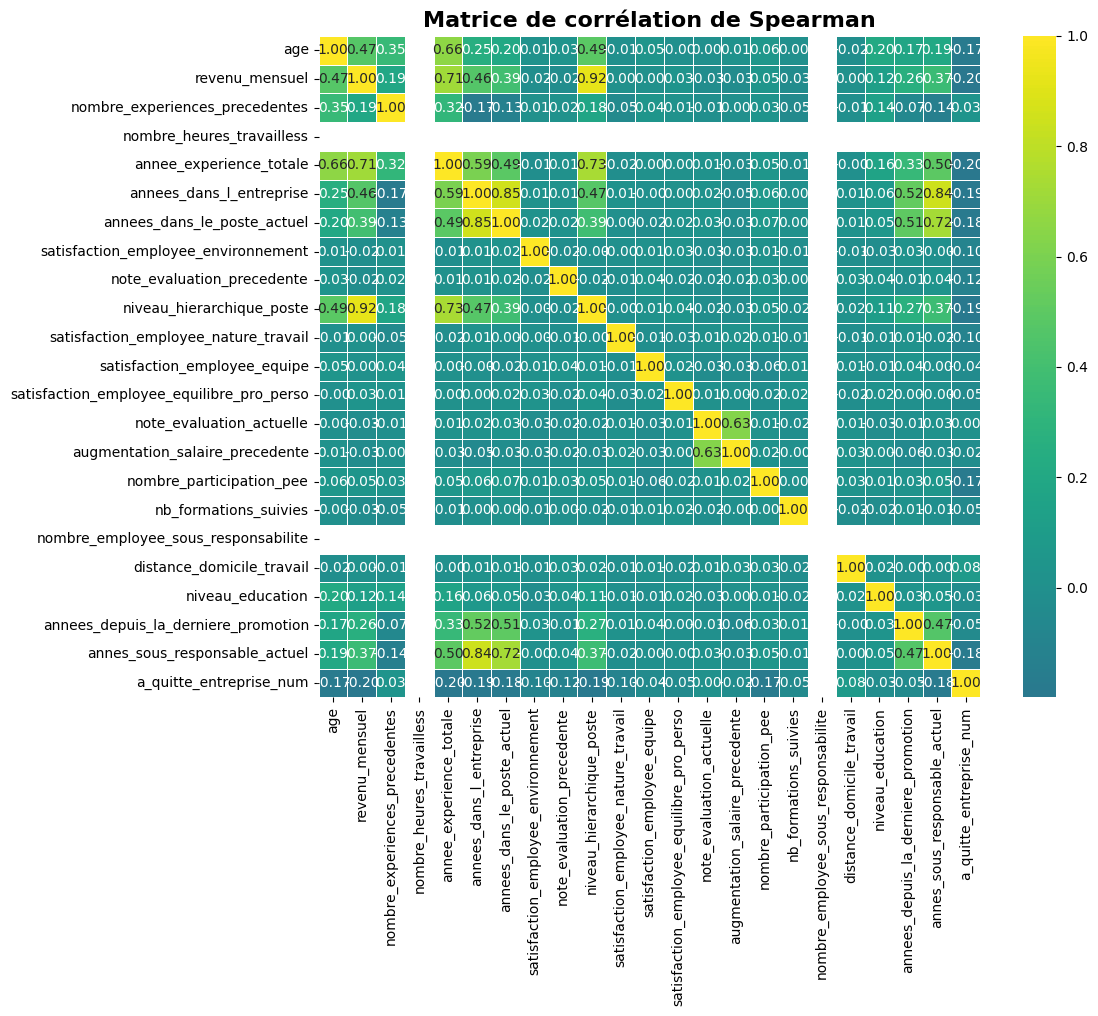


Comparaison Pearson vs Spearman (différences > 0.2):


In [20]:
selected_features = X_num.columns[:3]  

# Créer un DataFrame avec y pour colorer par classe
df_pairplot = X_num[selected_features].copy()
df_pairplot['target'] = y

sns.pairplot(df_pairplot, hue='target', palette=['#2ecc71', '#e74c3c'],
             diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot des principales features', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Matrice de corrélation de Spearman (pour corrélations non-linéaires monotones)
spearman_matrix = X_num.corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(spearman_matrix, annot=True, fmt='.2f', cmap='viridis', 
            center=0, square=True, linewidths=0.5)
plt.title('Matrice de corrélation de Spearman', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Comparer Pearson vs Spearman
print("\nComparaison Pearson vs Spearman (différences > 0.2):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        diff = abs(spearman_matrix.iloc[i, j] - correlation_matrix.iloc[i, j])
        if diff > 0.2:
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}:")
            print(f"  Pearson: {correlation_matrix.iloc[i, j]:.3f}")
            print(f"  Spearman: {spearman_matrix.iloc[i, j]:.3f}")
            print(f"  Différence: {diff:.3f}\n")